# ANALYSIS FOR YEAR 2021

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import plotly.express as px

In [7]:
df_2021 = pd.read_csv('../Datasets/Datasets2.csv')

In [8]:
df_2021.head()

,Country,ISO Code,Region,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation
0,Afghanistan,AFG,Asia Pacific,122,122,59.81,36.72,65.60,3,3,0,0,Difficult
1,Albania,ALB,Europe,83,84,69.41,76.02,69.41,0,0,0,0,Problematic
2,Algeria,DZA,Arab States,146,146,52.74,64.45,52.74,0,0,1,0,Difficult
3,Andorra,AND,Europe,39,37,76.68,100.00,76.68,0,0,0,0,Satisfactory
4,Angola,AGO,Africa,103,106,65.94,74.35,65.94,0,0,0,0,Problematic


In [9]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   180 non-null    object 
 1   ISO Code                  179 non-null    object 
 2   Region                    179 non-null    object 
 3   Position 2021             180 non-null    int64  
 4   Position 2020             180 non-null    int64  
 5   Global Score              180 non-null    float64
 6   With Abuses               180 non-null    float64
 7   Without Abuses            180 non-null    float64
 8   Journalist Killed         180 non-null    int64  
 9   Media Workers Killed      180 non-null    int64  
 10  Journalist Imprisoned     180 non-null    int64  
 11  Media Workers Imprisoned  180 non-null    int64  
 12  Situation                 180 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 18.4+ KB


In [10]:
df_2021.describe()

,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,90.500000,64.918278,79.199500,65.396056,0.255556,0.022222,1.577778,0.077778
std,52.105662,52.105662,15.831011,22.641547,15.744684,0.846433,0.235307,8.761237,0.712659
min,1.000000,1.000000,18.550000,17.410000,17.950000,0.000000,0.000000,0.000000,0.000000
25%,45.750000,45.750000,56.180000,64.450000,56.612500,0.000000,0.000000,0.000000,0.000000
50%,90.500000,90.500000,68.310000,86.140000,68.425000,0.000000,0.000000,0.000000,0.000000
75%,135.250000,135.250000,75.562500,100.000000,75.565000,0.000000,0.000000,0.000000,0.000000
max,180.000000,180.000000,93.280000,100.000000,93.280000,7.000000,3.000000,107.000000,9.000000


In [11]:
df_2021['Position 2021 Change'] = df_2021['Position 2020'] - df_2021['Position 2021']

In [13]:
df_2021

,Country,ISO Code,Region,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2021 Change
0,Afghanistan,AFG,Asia Pacific,122,122,59.81,36.72,65.60,3,3,0,0,Difficult,0
1,Albania,ALB,Europe,83,84,69.41,76.02,69.41,0,0,0,0,Problematic,1
2,Algeria,DZA,Arab States,146,146,52.74,64.45,52.74,0,0,1,0,Difficult,0
3,Andorra,AND,Europe,39,37,76.68,100.00,76.68,0,0,0,0,Satisfactory,-2
4,Angola,AGO,Africa,103,106,65.94,74.35,65.94,0,0,0,0,Problematic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,South America,148,147,52.40,45.71,53.84,0,0,0,0,Difficult,-1
176,Vietnam,VNM,Asia Pacific,175,175,21.54,31.96,24.82,0,0,24,0,Very Serious,0
177,Yemen,YEM,Middle East,169,167,37.65,46.67,37.65,4,0,5,0,Very Serious,-2
178,Zambia,ZMB,Africa,115,120,61.79,100.00,61.79,0,0,0,0,Difficult,5


In [15]:
df_2021.Region.value_counts()

Europe              47
Africa              43
Asia Pacific        38
South America       24
Middle  East        15
Arab States          9
North America        2
South al America     1
Name: Region, dtype: int64

In [16]:
df_2021[df_2021.Country == 'Mexico']

,Country,ISO Code,Region,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2021 Change
104,Mexico,MEX,South America,143,143,53.29,32.75,58.16,7,0,0,0,Difficult,0


In [17]:
tables = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php')
tables[2].set_index('ISO-alpha3 Code', inplace=True)
regions = tables[2][['Region 1', 'Continent']]
df_2021 = pd.merge(df_2021, regions, how='left', left_on='ISO Code', right_index=True)
df_2021.drop('Region', axis=1, inplace=True)
df_2021.rename(columns={'Region 1':'Region'}, inplace=True)

In [18]:
df_2021.loc['Kosovo', 'Region'] = 'Southern Europe'
df_2021.loc['Kosovo', 'Continent'] = 'Europe'
df_2021.loc['Taiwan', 'Region'] = 'Eastern Asia'
df_2021.loc['Taiwan', 'Continent'] = 'Asia'
df_2021.loc['OECS', 'Region'] = 'Caribbean'
df_2021.loc['OECS', 'Continent'] = 'North America'

In [22]:
fig = px.choropleth(df_2021, locations='ISO Code', color='Region',  hover_name = df_2021.index, hover_data=["Position 2021"], title = 'Regions')
fig.show()

In [23]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to OECS
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   180 non-null    object 
 1   ISO Code                  179 non-null    object 
 2   Position 2021             180 non-null    float64
 3   Position 2020             180 non-null    float64
 4   Global Score              180 non-null    float64
 5   With Abuses               180 non-null    float64
 6   Without Abuses            180 non-null    float64
 7   Journalist Killed         180 non-null    float64
 8   Media Workers Killed      180 non-null    float64
 9   Journalist Imprisoned     180 non-null    float64
 10  Media Workers Imprisoned  180 non-null    float64
 11  Situation                 180 non-null    object 
 12  Position 2021 Change      180 non-null    float64
 13  Region                    181 non-null    object 
 14  Continent     

In [24]:
df_2021[df_2021['ISO Code'].isna()]

,Country,ISO Code,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2021 Change,Region,Continent
122,OECS,NaN,45.0,44.0,76.02,100.0,76.03,0.0,0.0,0.0,0.0,Satisfactory,-1.0,Northern Europe,Europe
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Europe,Europe
Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Asia,Asia
OECS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean,North America


## EXPLORATORY AND DATA ANAYSIS

In [25]:
#set color for seaborn visualizations
sns.set(rc={"axes.facecolor":"#d1f0ec", "grid.color":"#b7c7c9"})

In [28]:
fig = px.choropleth(df_2021, locations='ISO Code', color='Global Score',  hover_name = df_2021.Country, hover_data=["Position 2021", "Region", "Continent"], title='Global Score Map')
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12880\2596736063.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12880\2596736063.py:2: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



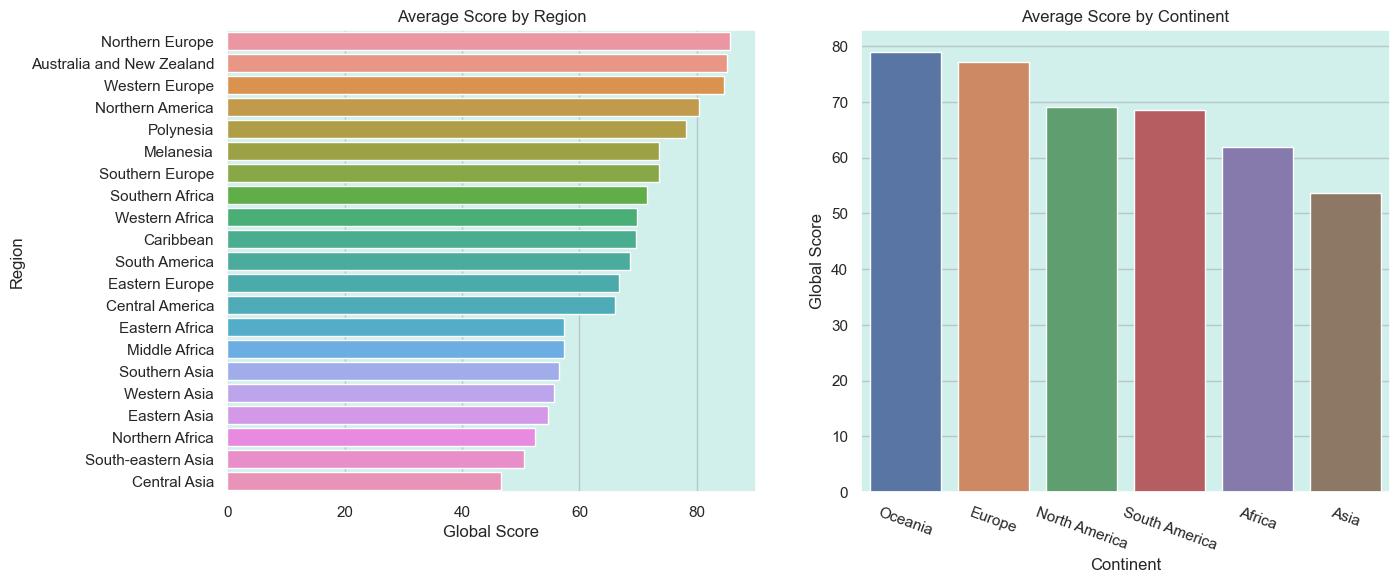

In [29]:
piv_con = pd.pivot_table(df_2021,index='Continent')
piv_reg = pd.pivot_table(df_2021,index='Region')


fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.barplot(ax=ax[1],data=piv_con, x = piv_con.index, y= 'Global Score',order=piv_con.sort_values('Global Score', ascending=False).index)
sns.barplot(ax=ax[0],data=piv_reg, x = 'Global Score', y= piv_reg.index,order=piv_reg.sort_values('Global Score', ascending=False).index)
ax[0].set_title('Average Score by Region')
ax[1].set_title('Average Score by Continent')
plt.xticks(rotation=-20)
plt.show()

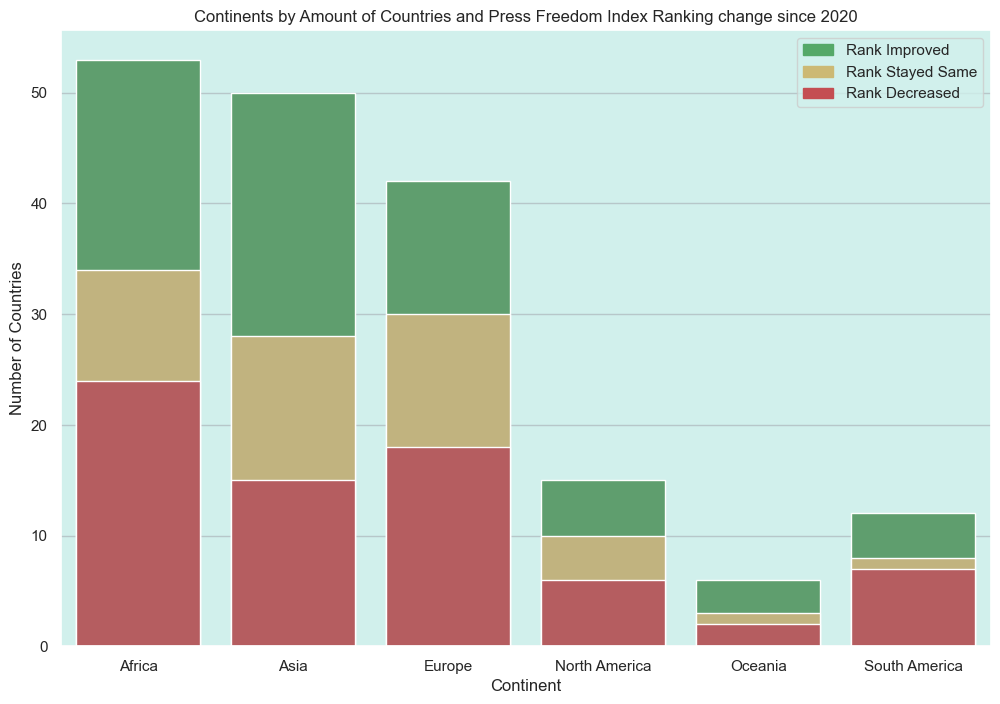

In [30]:
c = sns.color_palette() 
fig, ax = plt.subplots(figsize=(12,8))


total = df_2021.groupby('Continent')['Global Score'].count().reset_index()
bar1 = sns.barplot(x = 'Continent', y = 'Global Score', data=total, color=c[2])
same = df_2021[df_2021['Position 2021 Change'] <= 0].groupby('Continent')['Global Score'].count().reset_index()
bar1 = sns.barplot(x = 'Continent', y = 'Global Score', data=same, color=c[8])
decrease = df_2021[df_2021['Position 2021 Change'] < 0].groupby('Continent')['Global Score'].count().reset_index()
bar1 = sns.barplot(x = 'Continent', y = 'Global Score', data=decrease, color=c[3])

#Set up legend
top_bar = mpatches.Patch(color=c[2], label='Rank Improved')
middle_bar = mpatches.Patch(color=c[8], label='Rank Stayed Same')
bottom_bar = mpatches.Patch(color=c[3], label='Rank Decreased')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])
plt.ylabel('Number of Countries')
plt.title('Continents by Amount of Countries and Press Freedom Index Ranking change since 2020')

plt.show()

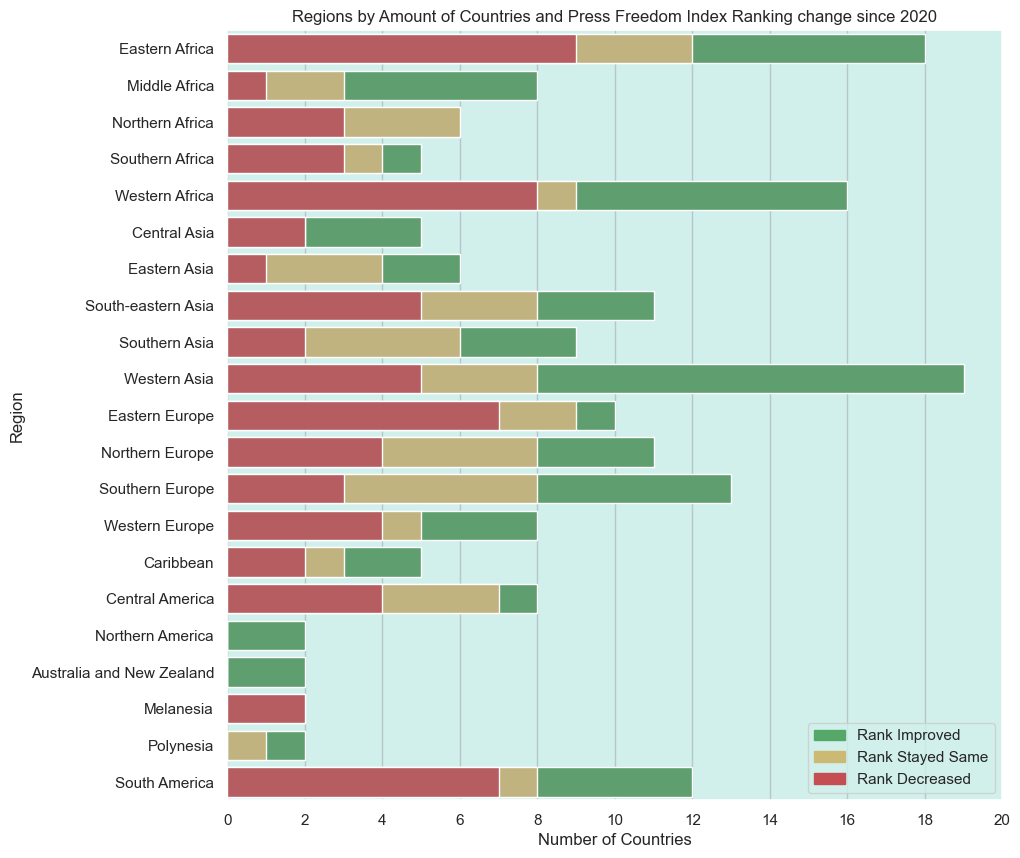

In [31]:
fig, ax = plt.subplots(figsize=(10,10))

total = df_2021.groupby(['Continent', 'Region'])['Global Score'].count()
same =df_2021[df_2021['Position 2021 Change'] <= 0].groupby(['Continent', 'Region'])['Global Score'].count().align(total, join='right', axis=0, fill_value=0)[0].reset_index()
decrease = df_2021[df_2021['Position 2021 Change'] <0].groupby(['Continent', 'Region'])['Global Score'].count().align(total, join='right', axis=0, fill_value=0)[0].reset_index()
total = total.reset_index()


bar1 = sns.barplot(y = 'Region', x = 'Global Score', data=total, color=c[2], ax=ax)
bar1 = sns.barplot(y = 'Region', x = 'Global Score', data=same, color=c[8], ax=ax)
bar1 = sns.barplot(y = 'Region', x = 'Global Score', data=decrease, color=c[3], ax=ax)

#Set up legend
top_bar = mpatches.Patch(color=c[2], label='Rank Improved')
middle_bar = mpatches.Patch(color=c[8], label='Rank Stayed Same')
bottom_bar = mpatches.Patch(color=c[3], label='Rank Decreased')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])

x_nums = np.linspace(0,20,num=11)
plt.xticks(x_nums)
plt.xlabel('Number of Countries')
plt.title('Regions by Amount of Countries and Press Freedom Index Ranking change since 2020')

plt.show()

In [33]:
df_2021[df_2021['Position 2021 Change'] == min(df_2021['Position 2021 Change'])]

,Country,ISO Code,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2021 Change,Region,Continent
98,Malaysia,MYS,119.0,101.0,60.53,100.0,60.53,0.0,0.0,0.0,0.0,Difficult,-18.0,South-eastern Asia,Asia


Malaysia saw the greatest fall in ranking, going from 101th in 2020 to 119th in 2021.

In [34]:
df_2021[df_2021['Position 2021 Change'] == max(df_2021['Position 2021 Change'])]

,Country,ISO Code,Position 2021,Position 2020,Global Score,With Abuses,Without Abuses,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2021 Change,Region,Continent
24,Burundi,BDI,147.0,160.0,52.43,60.68,52.43,0.0,0.0,0.0,0.0,Difficult,13.0,Eastern Africa,Africa


Burundi had the greatest improvement in ranking, going from 160th in 2020 to 147th in 2021.

In [35]:
df_2021['Situation'].value_counts()

Problematic     59
Difficult       52
Satisfactory    36
Very Serious    21
Good            12
Name: Situation, dtype: int64

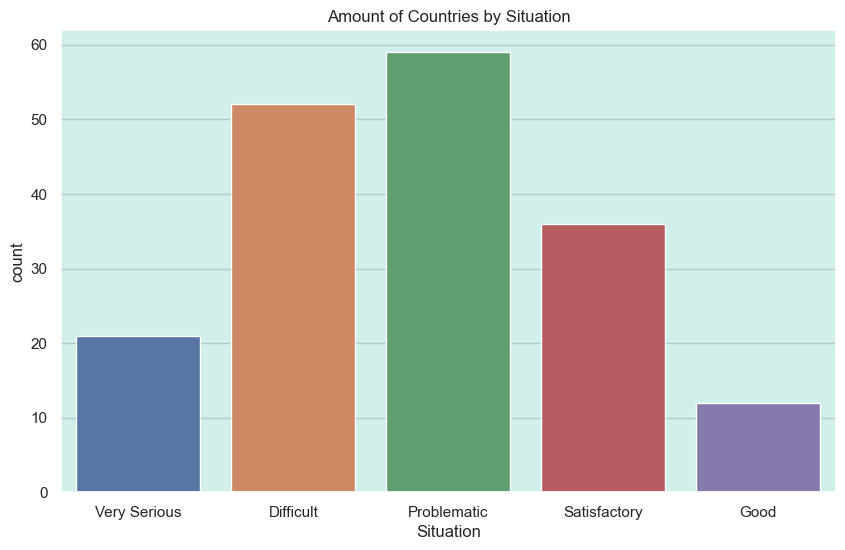

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Situation', data=df_2021, ax=ax, orient="h",order=['Very Serious', 'Difficult', 'Problematic', 'Satisfactory', 'Good'])
ax.set_title('Amount of Countries by Situation')
plt.show()

Text(0.5, 1.0, 'Amount of Countries by Global Score')

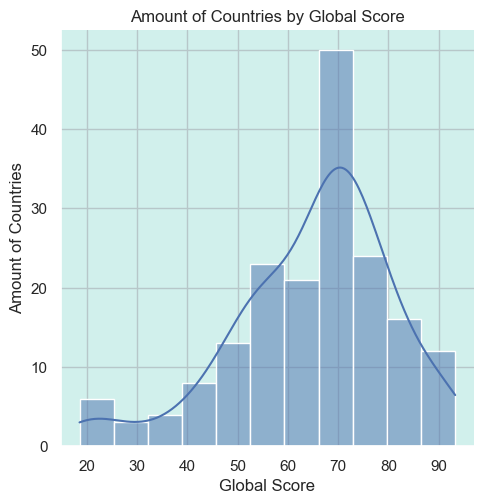

In [37]:
sns.displot(x='Global Score', data=df_2021, kde=True)
plt.ylabel('Amount of Countries')
plt.title('Amount of Countries by Global Score')

In [38]:
fig = px.choropleth(df_2021, locations='ISO Code', color='Situation',  hover_name = df_2021.Country, hover_data=["Position 2021", "Region", "Continent", "Global Score"], title='Situation Map')
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12880\3338513040.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



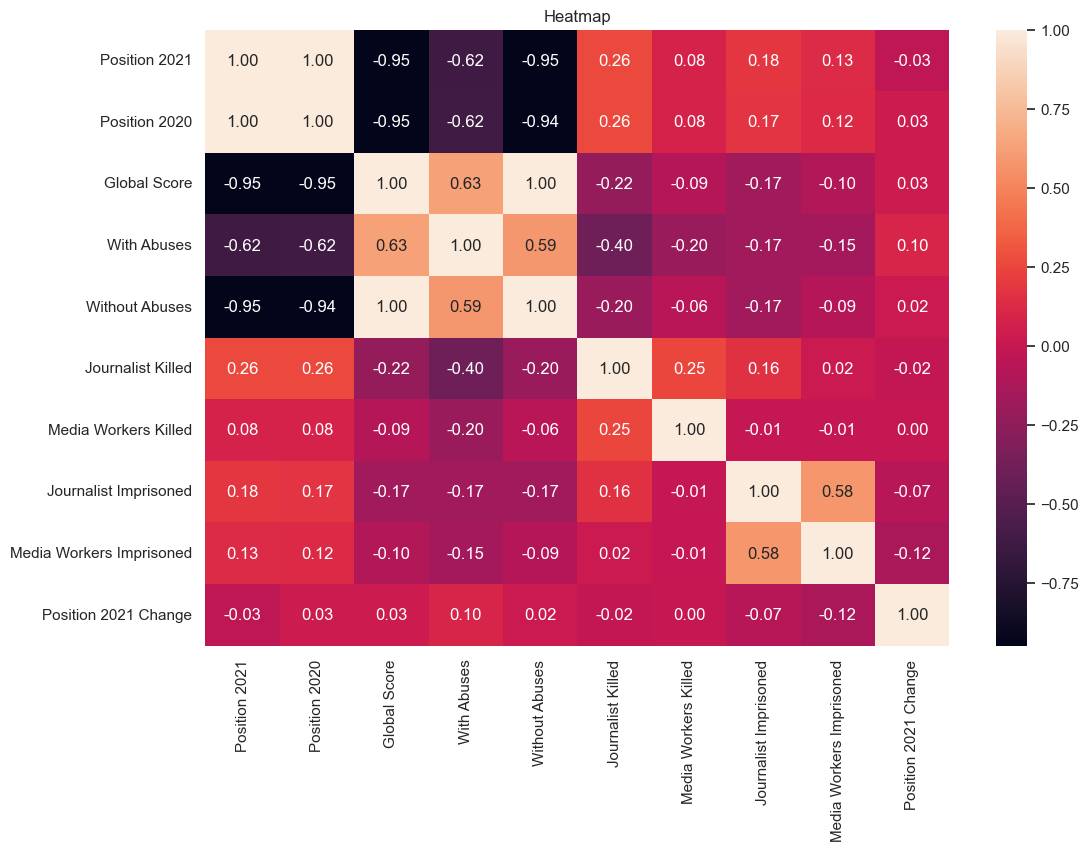

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_2021.corr(), annot=True, fmt=".2f")
plt.title('Heatmap')
plt.show()

In [41]:
cols = list(df_2021.describe().columns) #Get numerical columns
cols.remove('Global Score')
for col in cols:
    fig = px.scatter(df_2021, x = col, y = 'Global Score', color='Situation', facet_col='Continent', trendline="ols", trendline_scope="overall", hover_name = df_2021.Country, height=300, width=1100, title=col)
    fig.show()